In [1]:
import pandas as pd
import numpy as np

In [2]:
nfft = 512
hop_size = 256

In [3]:
bicoh_train_feat_path = '../features/bicoherences/dataframes/train_bicoh_stats_nfft_{}_hop_size_{}.pkl'.format(
    nfft, hop_size)
lpc_train_feat_path =  '../features/lpc/dataframe/train.pkl'
unet_train_feat_path = '../features/unet/train_nfft_{}_hop_size_{}.pkl'.format(nfft, hop_size)


bicoh_dev_feat_path = '../features/bicoherences/dataframes/dev_bicoh_stats_nfft_{}_hop_size_{}.pkl'.format(
    nfft, hop_size)
lpc_dev_feat_path =  '../features/lpc/dataframe/dev.pkl'
unet_dev_feat_path = '../features/unet/dev_nfft_{}_hop_size_{}.pkl'.format(nfft, hop_size)


bicoh_eval_feat_path = '../features/bicoherences/dataframes/eval_bicoh_stats_nfft_{}_hop_size_{}.pkl'.format(
    nfft, hop_size)
lpc_eval_feat_path =  '../features/lpc/dataframe/eval.pkl'
unet_eval_feat_path = '../features/unet/eval_nfft_{}_hop_size_{}.pkl'.format(nfft, hop_size)


In [81]:
selected_features = ['lpc', 'bicoh', 'unet']
selected_features = ['lpc']
number_lpc_order = 49
stop_lpc_order = 50

lpc_linspace = np.linspace(start=stop_lpc_order-number_lpc_order, stop=stop_lpc_order, dtype=int)

lpc_selected_orders = []
for l in lpc_linspace:
    lpc_selected_orders.append(str(l))
    
lpc_selected_orders = tuple(lpc_selected_orders)


In [104]:
train_features = pd.DataFrame()
dev_features = pd.DataFrame()
eval_features = pd.DataFrame()

for feat in selected_features:
    if feat == 'lpc':
        lpc_feat_train = pd.read_pickle(lpc_train_feat_path)
        lpc_feat_train.set_index('audio_filename', inplace=True)

        lpc_feat_dev = pd.read_pickle(lpc_dev_feat_path)
        lpc_feat_dev.set_index('audio_filename', inplace=True)

        lpc_feat_eval = pd.read_pickle(lpc_eval_feat_path)
        lpc_feat_eval.set_index('audio_filename', inplace=True)

        drop_list = [a for a in lpc_feat_train.columns if a.startswith(('lpc', 'ltp')) 
                 and not a.endswith(lpc_selected_orders)]
        
        lpc_feat_train = lpc_feat_train.drop(drop_list, axis=1)
        lpc_feat_dev = lpc_feat_dev.drop(drop_list, axis=1)
        lpc_feat_eval = lpc_feat_eval.drop(drop_list, axis=1)

        if train_features.empty:
            train_features = lpc_feat_train.copy()
            
            dev_features = lpc_feat_dev.copy()
            
            eval_features = lpc_feat_eval.copy()
        else:
            train_features = pd.concat([train_features, lpc_feat_train], axis=1)
            dev_features = pd.concat([dev_features, lpc_feat_dev], axis=1)
            eval_features = pd.concat([eval_features, lpc_feat_eval], axis=1)
        
    elif feat == 'bicoh':
        bicoh_feat_train = pd.read_pickle(bicoh_train_feat_path)
        bicoh_feat_train.set_index('audio_filename', inplace=True)

        bicoh_feat_dev = pd.read_pickle(bicoh_dev_feat_path)
        bicoh_feat_dev.set_index('audio_filename', inplace=True)

        bicoh_feat_eval = pd.read_pickle(bicoh_eval_feat_path)
        bicoh_feat_eval.set_index('audio_filename', inplace=True)

        if train_features.empty:
            train_features = bicoh_feat_train.copy()
            
            dev_features = bicoh_feat_dev.copy()
            
            eval_features = bicoh_feat_eval.copy()
        else:
            train_features = pd.concat([train_features, bicoh_feat_train], axis=1)
            dev_features = pd.concat([dev_features, bicoh_feat_dev], axis=1)
            eval_features = pd.concat([eval_features, bicoh_feat_eval], axis=1)
        
    elif feat== 'unet':
        unet_feat_train = pd.read_pickle(unet_train_feat_path)
        unet_feat_train.set_index('audio_filename', inplace=True)

        unet_feat_dev = pd.read_pickle(unet_dev_feat_path)
        unet_feat_dev.set_index('audio_filename', inplace=True)

        unet_feat_eval = pd.read_pickle(unet_eval_feat_path)
        unet_feat_eval.set_index('audio_filename', inplace=True)


        if train_features.empty:
            train_features = unet_feat_train.copy()
            
            dev_features = unet_feat_dev.copy()
            
            eval_features = unet_feat_eval.copy()
        else:
            train_features = pd.concat([train_features, unet_feat_train], axis=1)
            dev_features = pd.concat([dev_features, unet_feat_dev], axis=1)
            eval_features = pd.concat([eval_features, unet_feat_eval], axis=1)
            
            
train_features = train_features.loc[:,~train_features.columns.duplicated()]
dev_features = dev_features.loc[:,~dev_features.columns.duplicated()]
eval_features = eval_features.loc[:,~eval_features.columns.duplicated()]


train_features.reset_index(inplace=True)
dev_features.reset_index(inplace=True)
eval_features.reset_index(inplace=True)

In [105]:
y_train_open_set = train_features.loc[:, 'system_id']

In [106]:
train_features.dropna(inplace=True, axis=0)

In [107]:
train_features.drop(['audio_filename', 'start_voice', 'end_voice','speaker_id', 'label'], axis=1, inplace=True)
train_features.loc[:,train_features.columns != 'system_id' ].values

dev_features.drop(['audio_filename','start_voice', 'end_voice', 'speaker_id', 'label'], axis=1, inplace=True)
dev_features.loc[:,dev_features.columns != 'system_id' ].values

eval_features.drop(['audio_filename','start_voice', 'end_voice', 'speaker_id', 'label'], axis=1, inplace=True)
eval_features.loc[:,eval_features.columns != 'system_id' ].values

array([[ 1.57449533e+02,  5.14864493e+01,  1.33952403e+00, ...,
         6.86932293e-05, -1.84585675e-02,  6.82572450e-05],
       [ 1.59160123e+02,  1.75601091e+01,  1.00012395e+00, ...,
         2.11803983e-05, -8.84879761e-03,  2.11234521e-05],
       [ 5.36887627e+02,  4.61371228e+01,  1.08443507e+00, ...,
         6.71663434e-05, -1.67150607e-02,  6.65116806e-05],
       ...,
       [ 1.64500150e+02,  2.14572726e+01,  1.00099789e+00, ...,
         9.85507507e-05, -2.12348986e-02,  9.80778384e-05],
       [ 2.76316877e+02,  2.44367516e+01,  1.00000634e+00, ...,
         1.15967664e-04, -2.45732072e-02,  1.15444086e-04],
       [ 1.47700028e+02,  2.81909399e+01,  1.00010338e+00, ...,
         6.07386502e-05, -1.58664661e-02,  6.00462194e-05]])

In [121]:
print(train_features.columns)

AttributeError: 'Index' object has no attribute 'value'

In [115]:
X = X.reshape((-1, 50, 16))
X = np.swapaxes(X, 2, 1)
X = X.reshape(-1, 800)

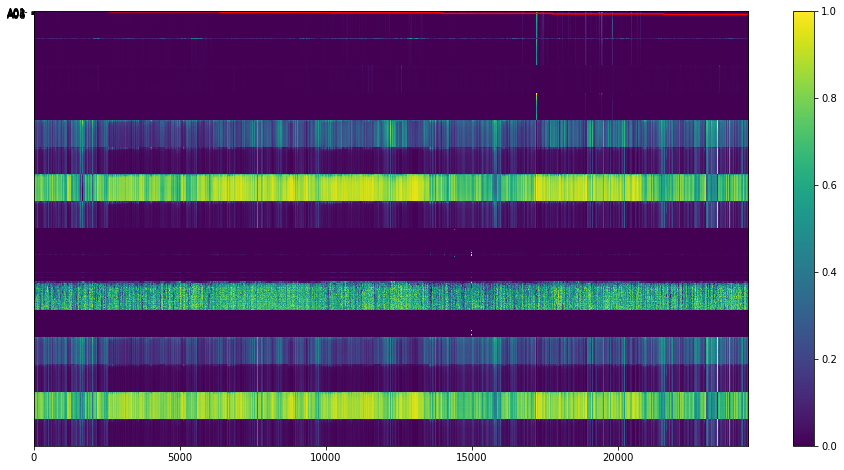

In [118]:
import matplotlib.pyplot as plt
X_norm = (X - np.min(X, axis=0))/(np.max(X, axis=0) - np.min(X, axis=0))
plt.figure(figsize=(16, 8))
plt.plot(train_features['system_id'], color='red')
plt.imshow(X_norm.transpose(), aspect='auto')

plt.colorbar()